### Kunal Katariya 
Spring 2025

##### Task
You are tasked with building a Convolution Neural Network (CNN) to classify images in the Food-101 dataset into one of the 101 food categories. Write a Python script that:
1. Loads the Dataset.
2. Pre-processes the data (resizing images, normalization)
3. Defines a CNN architecture
4. Compiles and trains the model.
5. Evaluates the model on the test set.

In [56]:
# importing all the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

#### Data Preprocessing
Where we're going to load the dataset and preprocess images.
Apply suitable data augmentation techniques for the training data.
& Normalize images for model input.

In [59]:
# loading the dataset
dataset_path = "/Users/kishorkataria/Downloads/food-101/images"

#downloaded the dataset from the website provided by prof. https://www.kaggle.com/datasets/dansbecker/food-101

In [61]:
# Data Preprocessing
# ImageDataGenerator helps in augmenting images for training to improve generalization
# Applying rescaling (normalization) and augmentation techniques

data_gen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to range [0,1]
    validation_split=0.2,  # Split dataset into 80% training and 20% validation
    rotation_range=30,  # Randomly rotate images up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,  # Apply shearing transformation
    zoom_range=0.2,  # Random zoom within 20%
    horizontal_flip=True  # Flip images horizontally for augmentation
)

# Load training data from directory with augmentation
train_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,  # Process 32 images at a time
    class_mode='categorical',  # Multi-class classification (101 categories)
    subset='training'  # Use 80% of data for training
)

# Load validation data from directory without augmentation (only normalization)
validation_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 20% of data for validation
)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


This output tells us about the structure of our image dataset.
"Found 80800 images belonging to 101" classes means, refers to training dataset.
And "Found 20200 images belonging to 101 classes", refers to validation dataset.
In summary, this output indicates that your dataset is structured in a way that is suitable for a multiclass classification problem.

Sample Training Images:


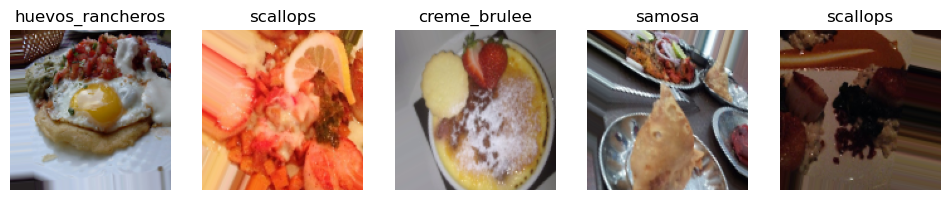

Sample Validation Images:


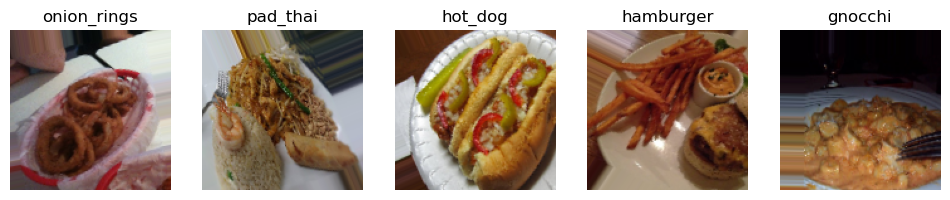

In [64]:
# displaying few sample images from the dataset.
def show_images(generator, num_images=5):
    """Displays a few sample images from a given data generator."""
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        batch = next(generator)  # Get a batch of images
        image = batch[0][0]  # Extract the first image from the batch
        label_index = tf.argmax(batch[1][0]).numpy()  # Get the corresponding label index
        label = list(generator.class_indices.keys())[list(generator.class_indices.values()).index(label_index)]  # Convert index to class label
        plt.imshow(image)  # Display image
        plt.title(label)  # Display class label
        plt.axis('off')  # Hide axis
    plt.show()

# Display sample training images
print("Sample Training Images:")
show_images(train_generator, num_images=5)

# Display sample validation images
print("Sample Validation Images:")
show_images(validation_generator, num_images=5)

This code defines a function to visualize images from a data generator, extracts images and their labels, and then uses this function to display sample images from both the training and validation generators.

#### CNN Model Architecture
We're going to build well-structured model with appropriate layers (convolutional, pooling, fully connected). The output later will have 101 neurons (for Food-101 classification). Using dropout and other regularization methods to avoid overfitting.

In [68]:
# Define CNN model
# A sequential model is used as it allows layer stacking
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),  # First convolutional layer with 32 filters
    MaxPooling2D(2,2),  # Max pooling reduces spatial dimensions
    
    Conv2D(64, (3,3), activation='relu'),  # Second convolutional layer with 64 filters
    MaxPooling2D(2,2),  # Max pooling to reduce dimensions
    
    Conv2D(128, (3,3), activation='relu'),  # Third convolutional layer with 128 filters
    MaxPooling2D(2,2),  # Max pooling again to reduce dimensions
    
    Flatten(),  # Flatten 2D feature maps into 1D vector for fully connected layers
    Dense(512, activation='relu'),  # Fully connected layer with 512 neurons
    Dropout(0.5),  # Dropout to prevent overfitting (50% of neurons are randomly disabled during training)
    Dense(101, activation='softmax')  # Output layer with 101 neurons (one per class) using softmax for multi-class classification
])


Above we have built a Convolutional Neural Network (CNN) model for image classification using TensorFlows Keras API. This model is designed as a sequential stack of layers. It involved convolutional layers (Conv2D) for feautre extraction, max pooling layers (MaxPooling2D) for downsampling, a flattening layer (Flatten) to prepare the feature maps for fully connected laters, dense layers (Dense) for classification, and a dropout later (Dropout) to reduce overfitting. This model is compiled with the Adam optimizer, categorical cross-entropy loss (which is suitable for multiclass classification), and accuracy as the evaluation metric.

We're using ReLU (Rectified Linear Unit) activation function in the convolutional and dense layers of the model. We're using ReLU only because it is very efficient very commonly used. We can also use different activation functions like Sigmoid, Tanh, ELU, LeakyReLU for other cases. The choice of activation function can imact the models performance.

We're using Maxpooling for several reason. One of the reason, it reduces the dimensions (height and width) of feature maps. This reduces the number of parameters and computations in the metwork, making it more efficient.

Dropout is as a regularization method to prevent overfitting. Dropout layer randomly sets 50% of the neurons activations to zero during each training update. This helps to prevent the network from relying too heavily on specific neuron, promoting reducing overfitting.

Other ways to reduce overfitting.
L1 or L2 Regularization, Early Stopping, Batch Normalization, Reduce Model Complexity, these techniques can also be used here to reduce overfitting.

#### Model Training
Correct use of Adam Optimizer and loss function.
Proper fitting of the model with appropriate steps per epoch and validation.
Experimenting with at least 10 epochs. (we're doing 15 epochs for better results)

In [71]:
# Compile the model
# Adam optimizer is chosen as it adapts learning rate dynamically
model.compile(optimizer=Adam(learning_rate=0.001),  # Learning rate set to 0.001
              loss='categorical_crossentropy',  # Suitable loss function for multi-class classification
              metrics=['accuracy'])  # Accuracy is the evaluation metric

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,  # Train for 15 epochs
    steps_per_epoch=len(train_generator),  # Define training steps per epoch
    validation_steps=len(validation_generator),  # Define validation steps per epoch
)

Epoch 1/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 411s 163ms/step - accuracy: 0.0223 - loss: 4.5420 - val_accuracy: 0.0614 - val_loss: 4.1975
Epoch 2/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 431s 171ms/step - accuracy: 0.0667 - loss: 4.1598 - val_accuracy: 0.1068 - val_loss: 3.9198
Epoch 3/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 431s 171ms/step - accuracy: 0.1058 - loss: 3.9137 - val_accuracy: 0.1410 - val_loss: 3.7092
Epoch 4/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 428s 170ms/step - accuracy: 0.1298 - loss: 3.7707 - val_accuracy: 0.1602 - val_loss: 3.6018
Epoch 5/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 429s 170ms/step - accuracy: 0.1482 - loss: 3.6627 - val_accuracy: 0.1759 - val_loss: 3.5132
Epoch 6/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 425s 168ms/step - accuracy: 0.1594 - loss: 3.6013 - val_accuracy: 0.1899 - val_loss: 3.4104
Epoch 7/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 424s 168ms/step - accuracy: 0.1684 - loss: 3.5385 - val_accuracy: 0.1958 - val_loss: 3.4187
Epoch 8/15
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 422s 167ms/step - ac

Using Adam optimizer because it adapts learning rates, uses momentum, and is generally efficient for training neural networks. We're using Adam Optimizer with a learning rate of 0.001. The loss funtion is categorical cross-entropy which is suitable for multiclass classification.
This code trains the neural network for 15 epochs, using the training data to learn and the validation data to check its performance after each epoch.

The model showed steady improvement over 15 epochs, starting with 2.23% training accuracy and reaching 20.71%, while validation accuracy improved from 6.14% to 23.37%. The loss consistently decreased, indicating learning progress. However, the accuracy is still low, suggesting the need for deeper architecture, fine-tuned hyperparameters, or additional training epochs. The model isnt overfitting yet, as both training and validation losses are reducing at a similar rate. Further optimizations, such as more data augmentation or transfer learning, could enhance performance.

#### Evaluation and Results
The model is evaluated on the test set with reasonable accuracy.
Plotting for training and validation accuracy/loss epochs.

In [81]:
# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

632/632 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.2398 - loss: 3.1875
Test Accuracy: 0.2335
Test Loss: 3.2088


Accuracy: Training (23.98%), Test (23.35%)- Model performs slightly better than random guessin.
Loss: High (~3.2), indicating poor learning and underfitting.
Training vs Test: Similar accuracy suggests no overfitting but weak generalization.

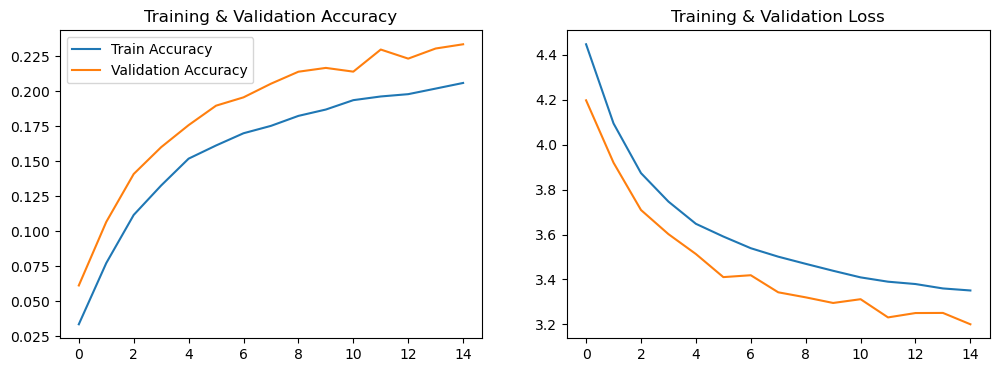

In [77]:
# Plot training history
# Visualizing accuracy and loss to analyze model performance
plt.figure(figsize=(12, 4))  # set the figure size for better readability of plots

# Plot accuracy
plt.subplot(1, 2, 1)   # create the first subplot (1 row, 2 columns, 1st plot)
plt.plot(history.history['accuracy'], label='Train Accuracy') #plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # plot validation accuracy
plt.legend()  # add a legend to differentiate lines
plt.title('Training & Validation Accuracy') # title for accuracy plot

# Plot loss
plt.subplot(1, 2, 2)  # create the second subplot (1 row, 2 columns, 2nd plot)
plt.plot(history.history['loss'], label='Train Loss')  # plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # plot validation loss
plt.legend  # add a legend for differentiation
plt.title('Training & Validation Loss')  # title for loss plot

plt.show()   # display the plots

Training & Validation Accuracy
Both training (Blue) and validation (orange) accuracy increase over epochs, indicating that the model is learning.
Validation accuracy is consistently higher than training accuracy, suggesting that the model generalizes well to unseen data.
However, accuracy remain low (~23%), meaning the model is struggling to learn meaningful features.

Training & Validation loss
Both training and validation loss decrease steadily, showing that the model is improving.
Validation loss is lower than training loss, which could indicate some regularization effects or slight underfitting (model not fully utilizing training data).
Loss values (~3.2) suggest the models predictions are still far from optimal.

Summary and Insights
Improvement: The model is learning over epochs (accuracy increasing, loss decreasing). 
Low Performance: Accuracy remains low (~23%), indicating insufficient feature learning.
Possible Fixes: Increase model complexity (more layers, neurons)
Optimize hyperparameters (Learning rate, batch size)
Improve data quality (augment, balance, clean)


#### Conclusion
The CNN model was trained to classify images from the Food-101 dataset. While the model showed signs of learning, as evidenced by the increasing accuracy and decreasing loss over epochs, the final accuracy achieved is relatively low (~23%).
1. Model complexity : The model might be too simple to learn the intricate features of the 101 food categories. Increasing the depth or complexity of the network could improve performance.
2. Training Time: Training for more epochs might allow the model to learn more effectively, although its crucial to monitor for overfitting.
3. Data Augmentation: While data augmentation was used, further experimentation with different augmentation techniques or parameters might be beneficial.
4. Hyperparameter Tuning: Optimizing hyperparameters such as the learning rate, batch size or optimizer setting could lead to better results.
In summary, while the model demonstrates a learning trend, further improvements are needed to achieve satisfactory classification accuracy. Future work should focus on exploring more complex architectures, optimizing hyperparameters, and potentially using transfer learning techniques.